# **Practical 4**
**Recurrent neural network (RNN):**  Use the Google stock prices dataset and design a timecseriesanalysis and prediction system using RNN.

### 1. Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### 2. Data processing

#### 2.0 import the data

In [ ]:
dataset_train = pd.read_csv(r'C:\Users\Sanjana\Desktop\Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [4]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [5]:
training_set.shape

(125, 1)

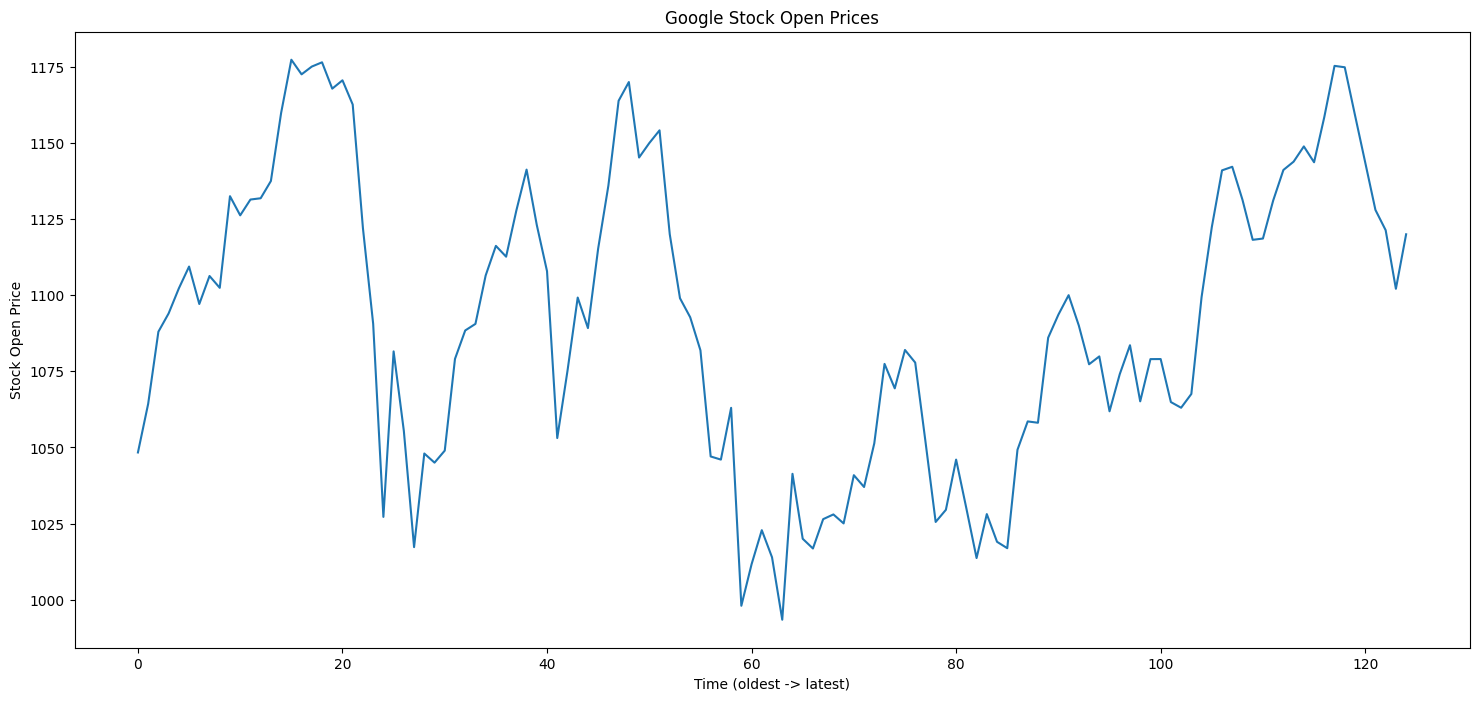

In [6]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

#### 2.1 Feature scaling

In [7]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

#### 2.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [9]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(65, 60)

In [11]:
y_train.shape

(65,)

#### 2.3 Data reshaping

In [12]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [13]:
X_train.shape

(65, 60, 1)

### 3. Create & Fit Model

#### 3.1 Create model

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

regressor = Sequential()

# Add an input layer
regressor.add(Input(shape=(X_train.shape[1], 1)))

# 1st LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# 2nd LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# 3rd LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# 4th LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

# Output layer
regressor.add(Dense(units=1))


In [15]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### 3.2 Model fit

In [17]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - loss: 0.2655
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 0.1576
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 0.0833
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0991
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0784
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0853
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.0910
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0784
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0685
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0527
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0725
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0626
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0698
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - loss: 0.0703
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.0872
Epo

#### 3.3 Model evaluation

#### 3.3.1 Read and convert

In [20]:
dataset_test = pd.read_csv(r'C:\Users\Sanjana\Desktop\Google_Stock_Price_Test.csv')

In [21]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [22]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

#### 3.3.2 Concat and convert

In [23]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#### 3.3.3 Reshape and scale

In [24]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [25]:
len(inputs)

185

#### 3.3.4 Create test data strucutre

In [26]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
X_test.shape

(125, 60, 1)

#### 3.3.5 Model prediction

In [28]:
predicted_stock_price = regressor.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step


In [29]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 3.3.6 Result visualization

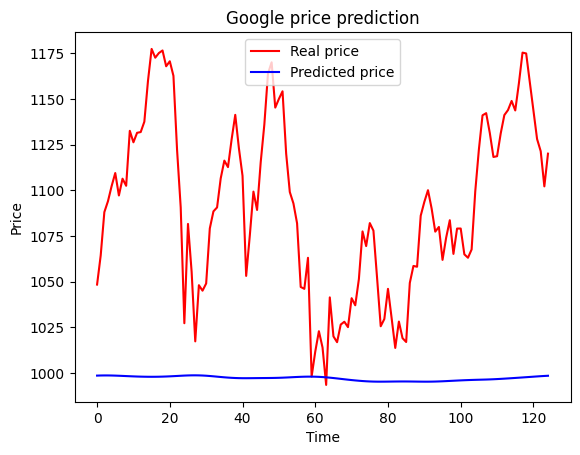

In [30]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()